## Importing Required Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns',None) # To Display All Columns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To ignore some of seaborn warning msg
#import folium
#from folium import plugins
import statsmodels.api as sm

## Loading the Dataset

In [3]:
data = pd.read_csv('USA_Housing.csv')

## Sanity Check

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
# Top 5 Records

data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
# Bottom 5 Records

data.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [7]:
# Name of Columns

data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [8]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
data.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [10]:
# Correlation among all variables

data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


## Shape of the Dataset

In [11]:
print(data.shape)

(5000, 7)


## Pairplot of the columns

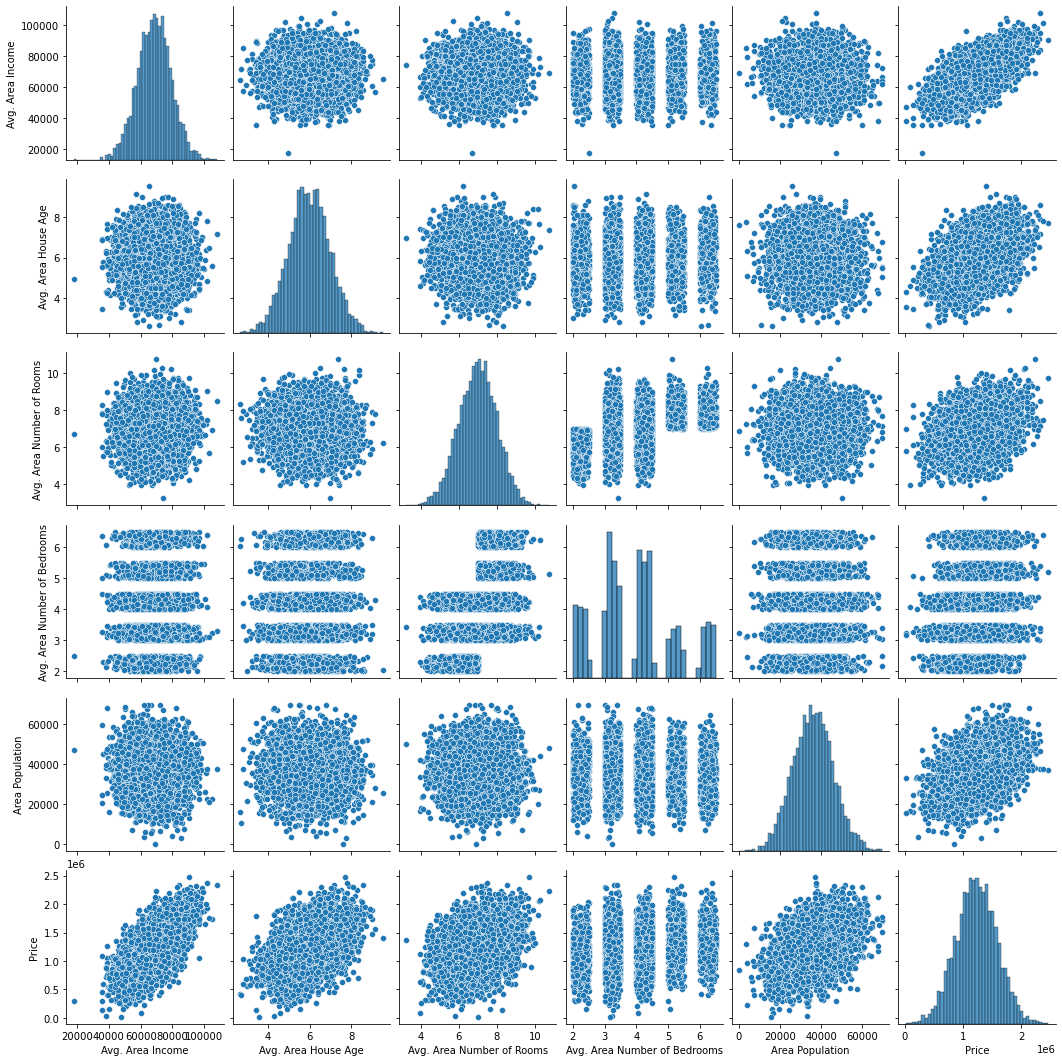

In [12]:
# Display correleation among all the variables 

sns.pairplot(data)

## Exploratory Data Analysis 

<AxesSubplot:>

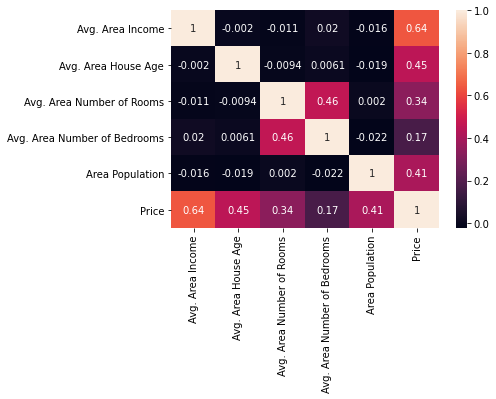

In [13]:
sns.heatmap(data.corr(), annot = True)

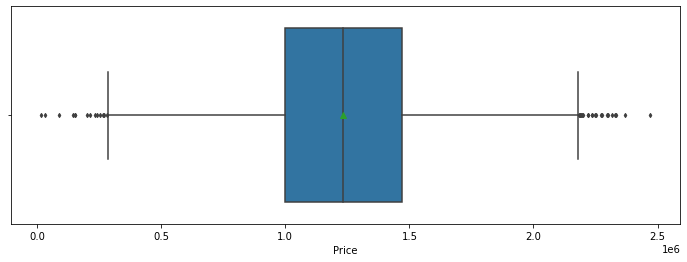

In [14]:
# Display the distribution of target column(price) using a boxplot

fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'Price', data = data, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()

## Correlation betweeen Independent and Dependent Variables 

###### Let's analyze the relationship between independent and dependent variable(Price). we will perform this analysis using scatter plot.

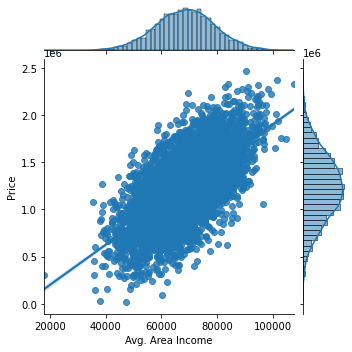

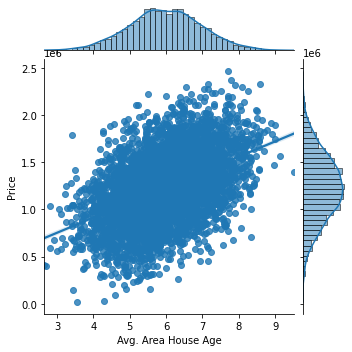

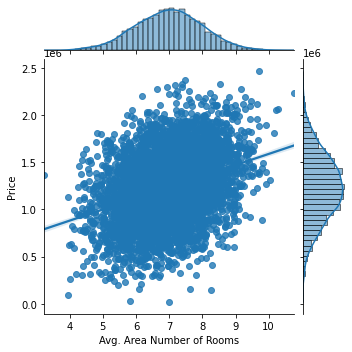

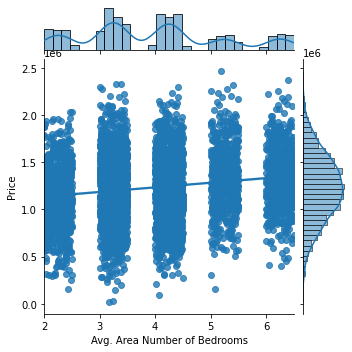

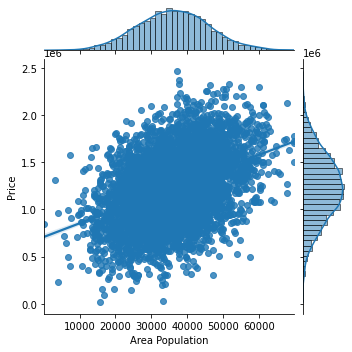

In [82]:
# Check correlation between Price and Avg Area Income
sns.jointplot(x="Avg. Area Income", y="Price", data=data, kind = 'reg', size = 5)

# Check correlation between Price and Avg. Area House Age
sns.jointplot(x="Avg. Area House Age",y="Price", data=data, kind = 'reg', size = 5)

# Check correlation between Price and Avg. Area Number of Rooms
sns.jointplot(x="Avg. Area Number of Rooms",y="Price", data=data, kind = 'reg', size = 5)

# Check correlation between Price and Avg. Area Number of Bedrooms
sns.jointplot(x="Avg. Area Number of Bedrooms",y="Price", data=data, kind = 'reg', size = 5)

# Check correlation between Price and Area Population
sns.jointplot(x="Area Population",y="Price", data=data, kind = 'reg', size = 5)
plt.show()

## Checking for Null or Missing Values

In [18]:
# No of null values in each column

data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [83]:
# Skewness Value for Each Column

data.skew()

Avg. Area Income               -0.033720
Avg. Area House Age            -0.007214
Avg. Area Number of Rooms      -0.040996
Avg. Area Number of Bedrooms    0.376240
Area Population                 0.050650
Price                          -0.002718
dtype: float64

# Multi Linear Regression using Sklearn Library

### Split the Dataset (70:30 Ratio)

In [50]:
# Split the dataset into test and train data

X=data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y,test_size = 0.3, random_state = 33)
print("Number of transactions train dataset: ", len(X_train_1))
print("Number of transactions test dataset: ", len(X_test_1))
print("Total number of transactions: ", len(X_train_1)+len(X_test_1))

Number of transactions train dataset:  3500
Number of transactions test dataset:  1500
Total number of transactions:  5000


In [51]:
# Importing Linear Regression from sklearn.linear_model

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_1,y_train_1)

LinearRegression()

In [52]:
coeff = pd.DataFrame(lm.coef_,X.columns,columns= ['Coefficient'])
coeff

,Coefficient
Avg. Area Income,21.684887
Avg. Area House Age,165929.536278
Avg. Area Number of Rooms,120456.285600
Avg. Area Number of Bedrooms,2658.748585
Area Population,15.239964


In [24]:
y_pred_1 = lm.predict(X_test_1)

<AxesSubplot:xlabel='Price'>

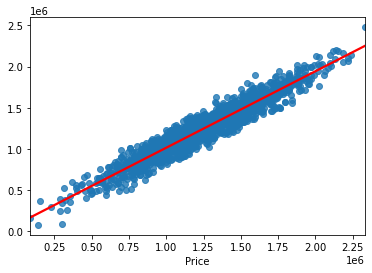

In [25]:
# Display graph for test and prediction data

sns.regplot(y_test_1, y_pred_1, line_kws={'color':'red'}, ci=None)

<AxesSubplot:xlabel='Price', ylabel='Density'>

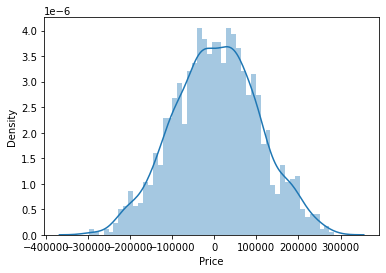

In [26]:
sns.distplot((y_test_1-y_pred_1),bins=50)

### Evaluation Metrics

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [38]:
# r-squared
r2 = r2_score(y_test_1,y_pred_1)
# adjusted r-squared
adj_r_sq = 1 - (1-lm.score(X_train_1, y_train_1))*(len(y_train_1)-1)/(len(y_train_1)-X_train_1.shape[1]-1)
# Error metrics
mse = mean_squared_error(y_test_1, y_pred_1)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_1, y_pred_1)
print("R Squared", r2)
print('Adjusted R2: ', adj_r_sq)
print("MSE", mse)
print("RMSE", rmse)
print("MAE", mae)

R Squared 0.9179502822493393
Adjusted R2:  0.9177491137351287
MSE 10229244617.768934
RMSE 101139.72818714184
MAE 81545.85478568153


In [29]:
Diff = (y_test_1-y_pred_1)

In [30]:
y_pred_test_1 = pd.DataFrame({"Actual Value":y_test_1,"Predicted Value":y_pred_1,"Difference":Diff})
y_pred_test_1

,Actual Value,Predicted Value,Difference
4843,1.167627e+06,1.372301e+06,-204673.891026
1883,9.434850e+05,8.509737e+05,92511.389915
2656,3.936391e+05,5.595015e+05,-165862.407857
1871,1.643292e+06,1.718499e+06,-75206.995799
792,9.490722e+05,1.069787e+06,-120714.372333
...,...,...,...
3176,1.489574e+06,1.411235e+06,78338.649429
3097,1.093506e+06,9.807114e+05,112794.581790
4034,4.973680e+05,5.008022e+05,-3434.117233
1742,8.206115e+05,8.736413e+05,-53029.816001


In [31]:
y_pred_test_1.describe()

,Actual Value,Predicted Value,Difference
count,1.500000e+03,1.500000e+03,1500.000000
mean,1.250243e+06,1.245605e+06,4637.559461
std,3.532060e+05,3.426897e+05,101067.043878
min,8.859177e+04,7.523091e+04,-298491.017469
25%,1.014446e+06,1.015633e+06,-63836.048074
50%,1.244027e+06,1.240090e+06,4949.373750
75%,1.497215e+06,1.483978e+06,74057.567116
max,2.332111e+06,2.477235e+06,285083.817209


### Split the Dataset (30:70 Ratio)

In [39]:
X=data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']
from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y,test_size = 0.7, random_state = 42)
print("Number of transactions train dataset: ", len(X_train_2))
print("Number of transactions test dataset: ", len(X_test_2))
print("Total number of transactions: ", len(X_train_2)+len(X_test_2))

Number of transactions train dataset:  1500
Number of transactions test dataset:  3500
Total number of transactions:  5000


In [40]:
lm1 = LinearRegression()
lm1.fit(X_train_2,y_train_2)

LinearRegression()

In [41]:
coeff = pd.DataFrame(lm1.coef_,X.columns,columns= ['Coefficient'])
coeff

,Coefficient
Avg. Area Income,21.593353
Avg. Area House Age,164766.362502
Avg. Area Number of Rooms,118757.489909
Avg. Area Number of Bedrooms,1329.361176
Area Population,15.060416


In [42]:
y_pred_2 = lm1.predict(X_test_2)

<AxesSubplot:xlabel='Price'>

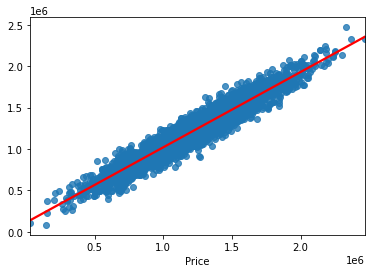

In [43]:
# Display graph for test and prediction data

sns.regplot(y_test_2, y_pred_2, line_kws={'color':'red'}, ci=None)

<AxesSubplot:xlabel='Price', ylabel='Density'>

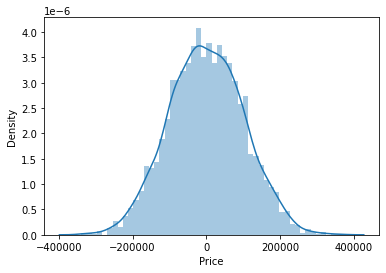

In [44]:
sns.distplot((y_test_2-y_pred_2),bins=50)

### Evaluation Metrics

In [46]:
# r-squared
r2 = r2_score(y_test_2,y_pred_2)
# adjusted r-squared
adj_r_sq = 1 - (1-lm1.score(X_train_2, y_train_2))*(len(y_train_2)-1)/(len(y_train_2)-X_train_2.shape[1]-1)
# Error metrics
mse = mean_squared_error(y_test_2, y_pred_2)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_2, y_pred_2)
print("R Squared", r2)
print('Adjusted R2: ', adj_r_sq)
print("MSE", mse)
print("RMSE", rmse)
print("MAE", mae)

R Squared 0.9161762491794068
Adjusted R2:  0.9215577243843973
MSE 10230181629.180737
RMSE 101144.36034293131
MAE 81432.01153833035


# Univariate Linear Regression

In [61]:
def run_linear_reg(X_train, X_test, y_train, y_test):
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    coeff = pd.DataFrame(lm.coef_,X.columns,columns= ['Coefficient'])
    print(coeff)
    y_pred = lm.predict(X_test)
    sns.regplot(y_test, y_pred, line_kws={'color':'red'}, ci=None)
    sns.distplot((y_test-y_pred),bins=50)
    
    r2 = r2_score(y_test,y_pred )
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    print("R Squared", r2)
    print("MSE", mse)
    print("RMSE", rmse)
    print("MAE", mae)
    
    return y_pred, coeff, r2, mse, rmse, mae

In [64]:
# Univariate Regression for Avg. Area Income
X = data[['Avg. Area Income']]    #'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population'
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
print("Number of transactions train dataset: ", len(X_train))
print("Number of transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number of transactions train dataset:  3000
Number of transactions test dataset:  2000
Total number of transactions:  5000


                  Coefficient
Avg. Area Income    21.187191
R Squared 0.4142133713425561
MSE 70951761434.89996
RMSE 266367.71845495835
MAE 212716.59412924686


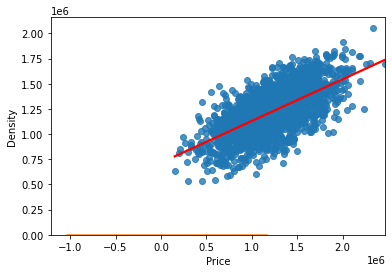

In [65]:
# Univariate Regression for Avg. Area Income
y_pred, coeff, r2, mse, rmse, mae = run_linear_reg(X_train, X_test, y_train, y_test)

In [69]:
# Univariate Regression for Avg. Area House Age
X = data[['Avg. Area House Age']]    #'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population'
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
print("Number of transactions train dataset: ", len(X_train))
print("Number of transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number of transactions train dataset:  3000
Number of transactions test dataset:  2000
Total number of transactions:  5000


                       Coefficient
Avg. Area House Age  164686.190586
R Squared 0.1949167821568536
MSE 97513445362.4621
RMSE 312271.4289884076
MAE 249455.31049131675


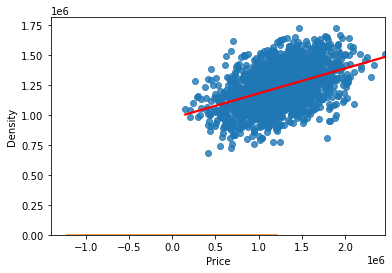

In [70]:
# Univariate Regression for Avg. Area House Age
y_pred, coeff, r2, mse, rmse, mae = run_linear_reg(X_train, X_test, y_train, y_test)

In [72]:
# Univariate Regression for Area Population
X = data[['Area Population']]    #'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population'
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
print("Number of transactions train dataset: ", len(X_train))
print("Number of transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number of transactions train dataset:  3000
Number of transactions test dataset:  2000
Total number of transactions:  5000


                 Coefficient
Area Population    14.799328
R Squared 0.15971093178389884
MSE 101777655186.60849
RMSE 319026.10424008954
MAE 253537.34235203732


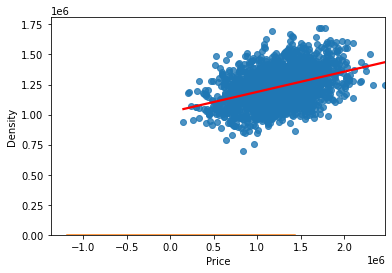

In [73]:
# Univariate Regression for Area Population
y_pred, coeff, r2, mse, rmse, mae = run_linear_reg(X_train, X_test, y_train, y_test)

# Bivariate Linear Regression

In [74]:
# Bivariate Regression for Avg. Area Income and Avg. Area House Age
X = data[['Avg. Area Income', 'Avg. Area House Age']]    #, 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population'
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
print("Number of transactions train dataset: ", len(X_train))
print("Number of transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number of transactions train dataset:  3000
Number of transactions test dataset:  2000
Total number of transactions:  5000


                       Coefficient
Avg. Area Income         21.169737
Avg. Area House Age  164424.296399
R Squared 0.6144864047806813
MSE 46694252309.24329
RMSE 216088.52887009826
MAE 171579.22086229787


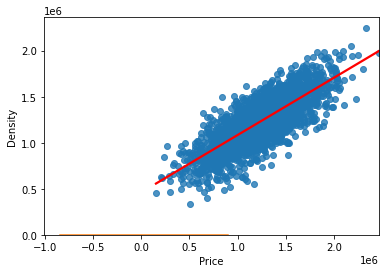

In [75]:
# Bivariate Regression for Avg. Area Income and Avg. Area House Age
y_pred, coeff, r2, mse, rmse, mae = run_linear_reg(X_train, X_test, y_train, y_test)

In [77]:
# Bivariate Regression for Avg. Area Number of Rooms and Avg. Area Number of Bedrooms
X = data[['Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms']]    #, 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population'
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
print("Number of transactions train dataset: ", len(X_train))
print("Number of transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number of transactions train dataset:  3000
Number of transactions test dataset:  2000
Total number of transactions:  5000


                                Coefficient
Avg. Area Number of Rooms     113635.426240
Avg. Area Number of Bedrooms   10511.041164
R Squared 0.10669467703490632
MSE 108199100257.39058
RMSE 328936.3164160968
MAE 263185.6193936204


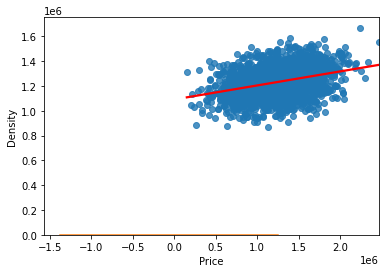

In [78]:
# Bivariate Regression for Avg. Area Number of Rooms and Avg. Area Number of Bedrooms
y_pred, coeff, r2, mse, rmse, mae = run_linear_reg(X_train, X_test, y_train, y_test)

In [80]:
# Bivariate Regression for Avg. Area Income and Area Population
X = data[['Avg. Area Income', 'Area Population']]    #, 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population'
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
print("Number of transactions train dataset: ", len(X_train))
print("Number of transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number of transactions train dataset:  3000
Number of transactions test dataset:  2000
Total number of transactions:  5000


                  Coefficient
Avg. Area Income    21.621685
Area Population     15.501606
R Squared 0.5708957947477304
MSE 51974042616.079254
RMSE 227978.1625859794
MAE 182431.2647999993


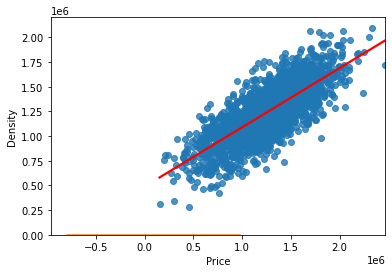

In [81]:
# Bivariate Regression for Avg. Area Income and Area Population
y_pred, coeff, r2, mse, rmse, mae = run_linear_reg(X_train, X_test, y_train, y_test)

# Observation

##### 1. From the univariate LR, we can see that the individual features/variables are not at all useful in predicting the house
##### price. Getting the R2 scores really small and the higher errors indicate a bad fit on individual features.

##### 2. From the bi-variate LR, we can see that the R2 score gets a little better than on the univariate LR but is still lower 
##### than the multi-variate regression, indicating a poor predicting model.

##### 3. Analysing the coefficients from Multi-variate regression output we can tell that the most important variable/feature 
##### for predicting the house price is the 'Avg. Area House Age' and least importance feature is the 'Area population'. 

##### 4. Although, logically and looking at the correlation matrix, the coefficient for 'Avg. Area Number of Bedrooms' should get
##### negative coefficient - the logic being that as the no. of bedrooms in a square foot house area goes up, the house price
##### should come down as a result of the rooms area getting smaller, but we do not see that from the model output suggesting 
##### we need more features like 'Square foot area of the house'.

##### 5. The 70:30 and 30:70 split in training and testing size did not make much of a difference in the R2 score and the error
##### metrics, which should not be the case in a regular dataset. Here it might be that the current dataset is so clean and
##### organized that model could get a good fit on the small dataset.

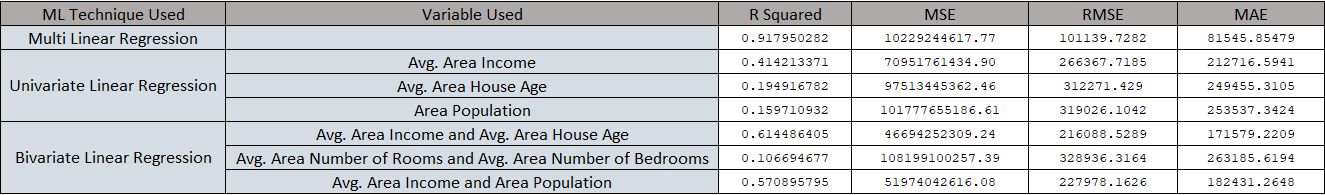